In [1]:
from fastai.vision.all import *
import datetime
import fastai
import json



In [2]:
torch.cuda.set_device(3)

In [3]:
batch_tfms = aug_transforms(flip_vert=True, max_lighting=0.1, max_zoom=1.05, max_warp=0.)

In [4]:
data_block = DataBlock(blocks = (ImageBlock, CategoryBlock), 
                           splitter=RandomSplitter(0.2),
                           get_items=get_image_files, 
                           get_y=parent_label,
                           item_tfms = Resize(224),
                           batch_tfms = batch_tfms) 
path = './plant_seedlings_v2'
data_loader = data_block.dataloaders(path)

In [9]:
resnet152 = cnn_learner(data_loader, fastai.vision.models.resnet152, metrics=[accuracy])

SuggestedLRs(valley=0.0008317637839354575)

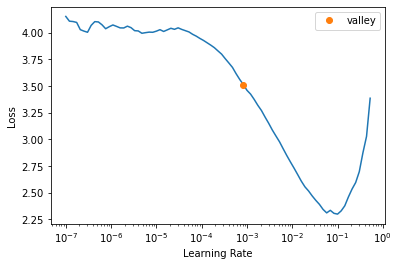

In [10]:
resnet152.lr_find()

In [11]:
lr = 1e-3
resnet152 = resnet152.to_fp16()

In [12]:
resnet152.fit_one_cycle(10, slice(lr))

epoch,train_loss,valid_loss,accuracy,time
0,2.207436,0.735264,0.757904,00:18
1,1.169247,0.409388,0.866305,00:17
2,0.731181,0.334705,0.883469,00:17
3,0.498921,0.265998,0.908762,00:17
4,0.361261,0.206727,0.929539,00:18
5,0.303492,0.209441,0.924119,00:17
6,0.242483,0.196678,0.931346,00:17
7,0.211166,0.179549,0.936766,00:17
8,0.193406,0.182113,0.936766,00:17
9,0.178803,0.179137,0.934959,00:17


SuggestedLRs(valley=1.4454397387453355e-05)

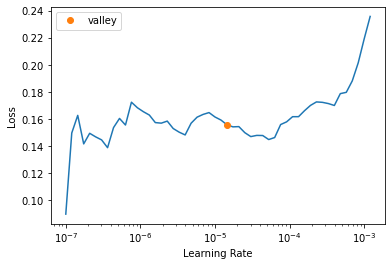

In [13]:
resnet152.unfreeze()
resnet152.lr_find()

In [14]:
resnet152.fit_one_cycle(11, slice(1e-5, lr/5))

epoch,train_loss,valid_loss,accuracy,time
0,0.158236,0.176764,0.935863,00:20
1,0.150138,0.181172,0.938573,00:20
2,0.139328,0.176179,0.943089,00:20
3,0.121158,0.159854,0.948510,00:20
4,0.094590,0.143611,0.953930,00:20
5,0.077927,0.128784,0.957543,00:20
6,0.062730,0.106971,0.963866,00:20
7,0.037780,0.121827,0.960253,00:20
8,0.027495,0.113542,0.962963,00:20
9,0.024793,0.104581,0.965673,00:20


SuggestedLRs(valley=1.4454397387453355e-05)

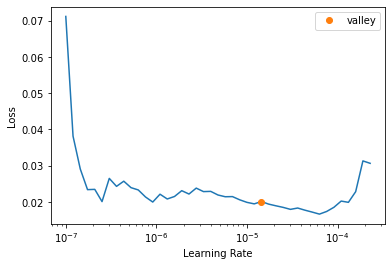

In [15]:
resnet152.unfreeze()
resnet152.lr_find()

In [16]:
resnet152.fit_one_cycle(11, slice(1e-5, lr/5))

epoch,train_loss,valid_loss,accuracy,time
0,0.020541,0.119641,0.964770,00:20
1,0.033229,0.153400,0.955736,00:20
2,0.064978,0.128736,0.957543,00:20
3,0.057965,0.147765,0.958446,00:20
4,0.043733,0.125465,0.963866,00:20
5,0.033582,0.105349,0.967480,00:20
6,0.027176,0.093880,0.974706,00:20
7,0.017599,0.098251,0.972900,00:20
8,0.013264,0.097707,0.976513,00:20
9,0.008969,0.091764,0.979223,00:20


In [17]:
resnet152.save("stage-5")

Path('models/stage-5.pth')

In [18]:
results= {}
start = torch.cuda.Event(enable_timing=True)
end =  torch.cuda.Event(enable_timing=True)
results["prediction"] = []
results["time"]=[]
results["truth"] = []

In [19]:
fnames = get_image_files("./Dataset/Database_Random")
#print(str(file.parent).replace('/home/ele_group_1/ml/Milestone6/Dataset/Database_Random/',''))
dummy = cnn_learner(data_loader, fastai.vision.models.alexnet, metrics=accuracy,).to_fp16()

In [27]:
for _ in range(10):
        for file in fnames:
            _ = dummy.predict(file)
            break
classified_result = []
timings = []
ground_truth = []

for file in fnames:
    with torch.no_grad():
          #torch.cuda.synchronize()
        start.record()
        result = resnet152.predict(file)
        end.record()
        torch.cuda.synchronize()
        classified_result.append(str(result[0]))
        #in milliseconds
        timings.append(start.elapsed_time(end))
        #print(result)
        ground_truth.append(str(file.parent).replace('Dataset/Database_Random/',''))  
results["prediction"] = classified_result
results["time"]=timings
results["truth"] = ground_truth
print(len(ground_truth))
print(len(classified_result))
with open('data.json', 'w') as fp:
        json.dump(results, fp)

900
900


In [26]:
print(results["truth"])

['Dataset/Database_Random/black_grass', 'Dataset/Database_Random/black_grass', 'Dataset/Database_Random/black_grass', 'Dataset/Database_Random/black_grass', 'Dataset/Database_Random/black_grass', 'Dataset/Database_Random/black_grass', 'Dataset/Database_Random/black_grass', 'Dataset/Database_Random/black_grass', 'Dataset/Database_Random/black_grass', 'Dataset/Database_Random/black_grass', 'Dataset/Database_Random/black_grass', 'Dataset/Database_Random/black_grass', 'Dataset/Database_Random/black_grass', 'Dataset/Database_Random/black_grass', 'Dataset/Database_Random/black_grass', 'Dataset/Database_Random/black_grass', 'Dataset/Database_Random/black_grass', 'Dataset/Database_Random/black_grass', 'Dataset/Database_Random/black_grass', 'Dataset/Database_Random/black_grass', 'Dataset/Database_Random/black_grass', 'Dataset/Database_Random/black_grass', 'Dataset/Database_Random/black_grass', 'Dataset/Database_Random/black_grass', 'Dataset/Database_Random/black_grass', 'Dataset/Database_Random

In [28]:
total_correct = 0
total_wrong = 0
for i in range(len(results["prediction"])):
    if(results["prediction"][i]==results["truth"][i]):
        total_correct +=1
    else:
        total_wrong +=1
print(total_correct)
print(total_wrong)

895
5


In [30]:
total_correct/(total_correct+total_wrong)*100

99.44444444444444

In [1]:
def get_x(r): return PATH+"/"+r['id']+EXT
        def get_y(r): return r['label']

IndentationError: unexpected indent (3572609121.py, line 2)

In [2]:
import fastai
fastai.__version__


'2.5.3'